In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [2]:
from tensorflow import keras
print("Keras version:", keras.__version__)

Keras version: 3.6.0


In [3]:
from keras.datasets import mnist

# Load data and split into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(type(X_train))  # Check the type of X_train
print(X_train.shape)  # Check the shape of X_train

print(type(y_train))  # Check the type of y_train
print(y_train.shape)  # Check the shape of y_train

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


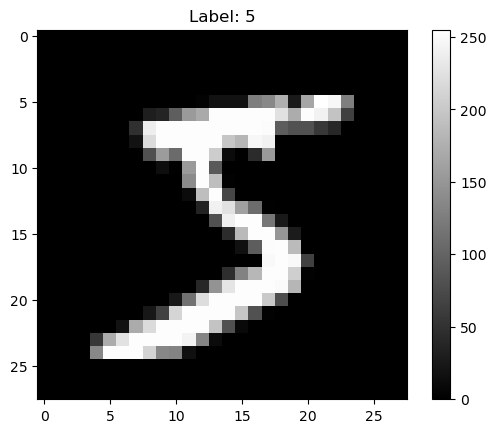

In [5]:
# Display the first image in X_train
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')  # Plot the first image
plt.title(f"Label: {y_train[0]}")
plt.colorbar()
plt.show()

In [6]:
# Normalize the pixel values to the range [0, 1]
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Check the type and shape after normalization
print(f"Type of X_train_normalized: {type(X_train_normalized)}")
print(f"Shape of X_train_normalized: {X_train_normalized.shape}")

Type of X_train_normalized: <class 'numpy.ndarray'>
Shape of X_train_normalized: (60000, 28, 28)


In [7]:
from keras.utils import to_categorical

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Check the type and shape of the encoded labels
print(f"Type of y_train_encoded: {type(y_train_encoded)}")
print(f"Shape of y_train_encoded: {y_train_encoded.shape}")
print(f"First encoded label (for digit {y_train[0]}): {y_train_encoded[0]}")

Type of y_train_encoded: <class 'numpy.ndarray'>
Shape of y_train_encoded: (60000, 10)
First encoded label (for digit 5): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [37]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

# Initialize the model
model = Sequential()

# Add layers
model.add(Input(shape=(28, 28)))           # Input layer
model.add(Flatten())                       # Flatten layer
model.add(Dense(128, activation='relu'))   # First hidden layer
model.add(Dense(64, activation='relu'))    # Second hidden layer
model.add(Dense(10, activation='softmax')) # Output layer

# Print model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
 X_train_normalized.shape[0]

60000

In [39]:
# Define number of batches
batch_size = 32  # Ensure consistency with the training configuration
data_size = X_train_normalized.shape[0]  # Total size of the training data
num_batches = data_size // batch_size  # Calculate total number of batches

# Define the optimizer
optimizer = tf.keras.optimizers.Adam()  # Initialize the Adam optimizer

# Compile the model
model.compile(
    optimizer=optimizer,               # Use the initialized Adam optimizer
    loss='categorical_crossentropy',   # Use categorical cross-entropy loss
    metrics=['accuracy']               # Track accuracy during training
)

In [40]:
# # Train the model
# history = model.fit(
#     X_train_normalized,        # Correct variable name for training inputs
#     y_train_encoded,           # One-hot encoded training labels
#     epochs=10,                 # Number of epochs
#     batch_size=32,             # Batch size
#     validation_split=0.2       # Use 20% of the training data for validation
# )


from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping_cb = EarlyStopping(
    monitor="val_loss",       # Metric to monitor
    patience=5,               # Number of epochs to wait after no improvement
    restore_best_weights=True # Restore weights from the best epoch
)

# Train the model with early stopping
history = model.fit(
    X_train_normalized,        # Correct variable name for training inputs
    y_train_encoded,           # One-hot encoded training labels
    epochs=20,                 # Maximum number of epochs
    batch_size=32,             # Batch size
    validation_split=0.2,      # Use 20% of the training data for validation
    callbacks=[early_stopping_cb]  # Include the early stopping callback
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8614 - loss: 0.4716 - val_accuracy: 0.9574 - val_loss: 0.1376
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9642 - loss: 0.1181 - val_accuracy: 0.9658 - val_loss: 0.1108
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9760 - loss: 0.0758 - val_accuracy: 0.9655 - val_loss: 0.1093
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9834 - loss: 0.0537 - val_accuracy: 0.9694 - val_loss: 0.1014
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9865 - loss: 0.0413 - val_accuracy: 0.9723 - val_loss: 0.1013
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9898 - loss: 0.0312 - val_accuracy: 0.9733 - val_loss: 0.0994
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0246 - val_accuracy: 0.9747 - val_loss: 0.0992
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9924 - loss: 0.0236 - 

In [41]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.9726 - loss: 0.1053
Test Loss: 0.0861
Test Accuracy: 0.9785


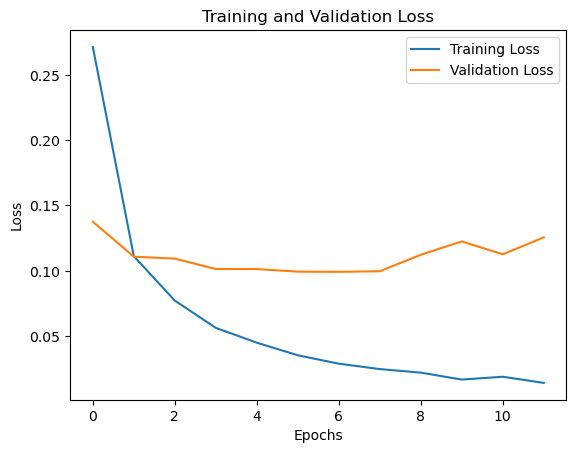

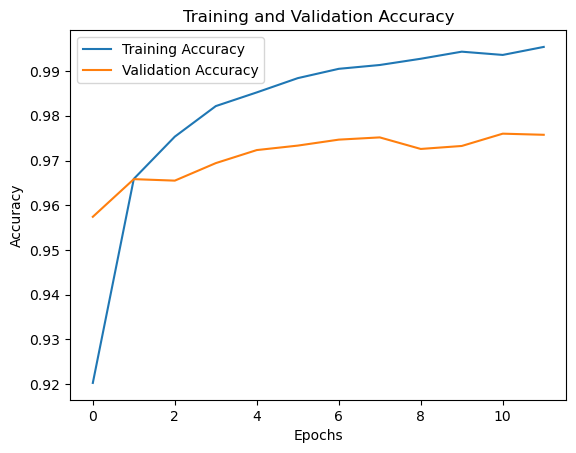

In [43]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

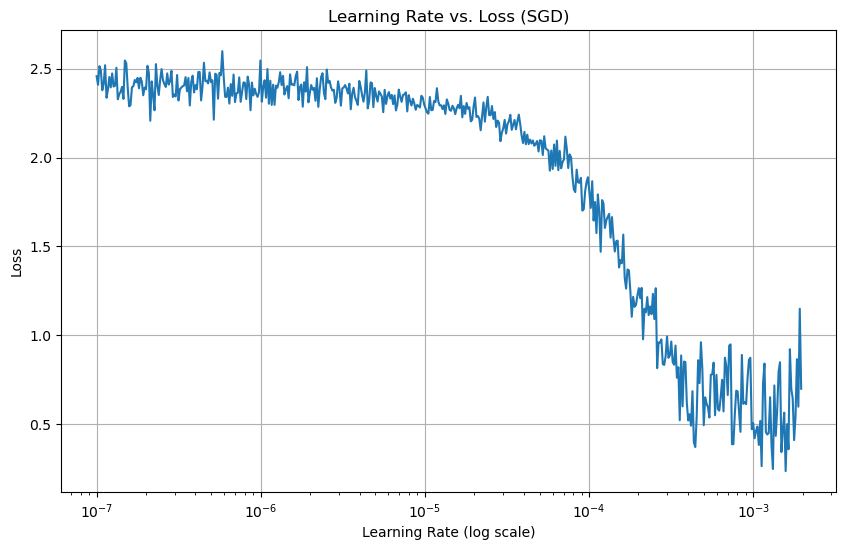

In [44]:
import tensorflow as tf
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot as plt



# Initialize the model
model = Sequential()

# Add layers
model.add(Input(shape=(28, 28)))           # Input layer
model.add(Flatten())                       # Flatten layer
model.add(Dense(128, activation='relu'))   # First hidden layer
model.add(Dense(64, activation='relu'))    # Second hidden layer
model.add(Dense(10, activation='softmax')) # Output layer


# Learning rate parameters
initial_lr = 1e-7
final_lr = 2e-3
num_batches = 500
lr_multiplier = (final_lr / initial_lr) ** (1 / num_batches)

# Optimizer with clipping and momentum
optimizer = SGD(learning_rate=initial_lr, clipvalue=1.0, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy')

# Data size and batch size
batch_size = 32  # Smaller batch size
data_size = X_train_normalized.shape[0]

# Initialize lists for learning rates and losses
losses = []
lrs = []

# Open file to save diagnostics data
with open("diagnostics_data_sgd.txt", "w") as file:
    file.write("Iteration, Learning Rate, Loss, Max Gradient\n")

    for i in range(num_batches):
        try:
            # Update learning rate
            current_lr = initial_lr * (lr_multiplier ** i)
            optimizer.learning_rate = float(current_lr)

            # Get data batch
            batch_start = (i * batch_size) % data_size
            batch_end = batch_start + batch_size
            x_batch = X_train_normalized[batch_start:batch_end]
            y_batch = y_train_encoded[batch_start:batch_end]

            # Forward and backward pass
            with tf.GradientTape() as tape:
                predictions = model(x_batch, training=True)
                loss = tf.keras.losses.categorical_crossentropy(y_batch, predictions)
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            # Diagnostics
            avg_loss = tf.reduce_mean(loss).numpy()
            max_gradient = max([tf.reduce_max(g).numpy() for g in gradients if g is not None])

            # Write diagnostics to file
            file.write(f"{i}, {current_lr:.8f}, {avg_loss:.4f}, {max_gradient:.4f}\n")

            # Record learning rate and loss
            lrs.append(current_lr)
            losses.append(avg_loss)

        except Exception as e:
            print(f"Error during iteration {i}: {e}")
            break

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(lrs, losses)
plt.xscale('log')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Loss')
plt.title('Learning Rate vs. Loss (SGD)')
plt.grid(True)
plt.show()

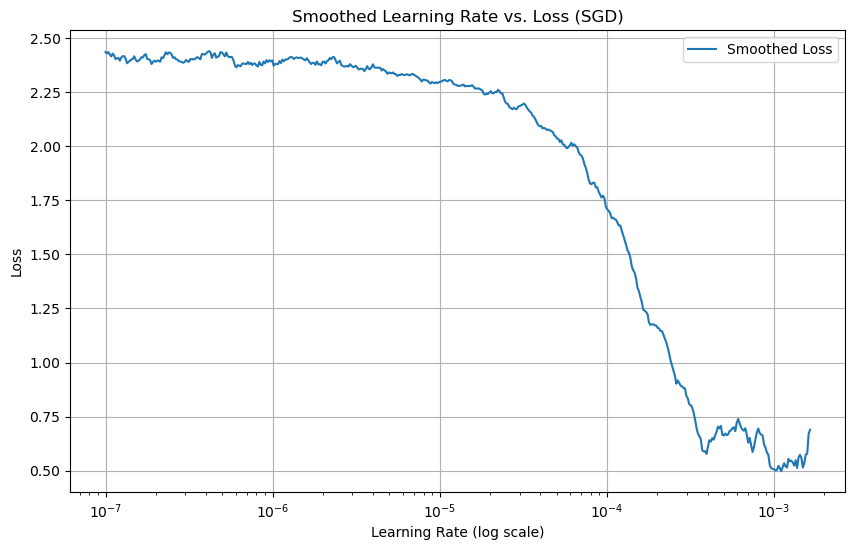

In [45]:
import numpy as np

# Compute moving average
window_size = 10
smoothed_losses = np.convolve(losses, np.ones(window_size)/window_size, mode='valid')

# Plot smoothed losses
plt.figure(figsize=(10, 6))
plt.plot(lrs[:len(smoothed_losses)], smoothed_losses, label="Smoothed Loss")
plt.xscale('log')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Loss')
plt.title('Smoothed Learning Rate vs. Loss (SGD)')
plt.grid(True)
plt.legend()
plt.show()

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

# Reinitialize the model
model = Sequential()

# Add layers
model.add(Input(shape=(28, 28)))           # Input layer
model.add(Flatten())                       # Flatten layer
model.add(Dense(128, activation='relu'))   # First hidden layer
model.add(Dense(64, activation='relu'))    # Second hidden layer
model.add(Dense(10, activation='softmax')) # Output layer

from keras.optimizers import SGD

# Finalize the optimizer with the chosen learning rate
final_learning_rate = 5e-4
optimizer = SGD(learning_rate=final_learning_rate, clipvalue=1.0, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model with the finalized optimizer
history = model.fit(
    X_train_normalized,  # Training data
    y_train_encoded,     # One-hot encoded labels
    epochs=40,           # Number of epochs
    batch_size=32,       # Batch size
    validation_split=0.2 # Use 20% of the training data for validation
)

Epoch 1/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.5499 - loss: 1.5389 - val_accuracy: 0.8852 - val_loss: 0.4324
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.8842 - loss: 0.4233 - val_accuracy: 0.9072 - val_loss: 0.3275
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.9041 - loss: 0.3382 - val_accuracy: 0.9178 - val_loss: 0.2927
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.9159 - loss: 0.3025 - val_accuracy: 0.9258 - val_loss: 0.2666
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.9199 - loss: 0.2776 - val_accuracy: 0.9291 - val_loss: 0.2518
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.9258 - loss: 0.2624 - val_accuracy: 0.9321 - val_loss: 0.2383
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9317 - loss: 0.2405 - val_accuracy: 0.9371 - val_loss: 0.2275
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9360 -

In [53]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)

print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.9668 - loss: 0.1167
Final Test Loss: 0.0988
Final Test Accuracy: 0.9714


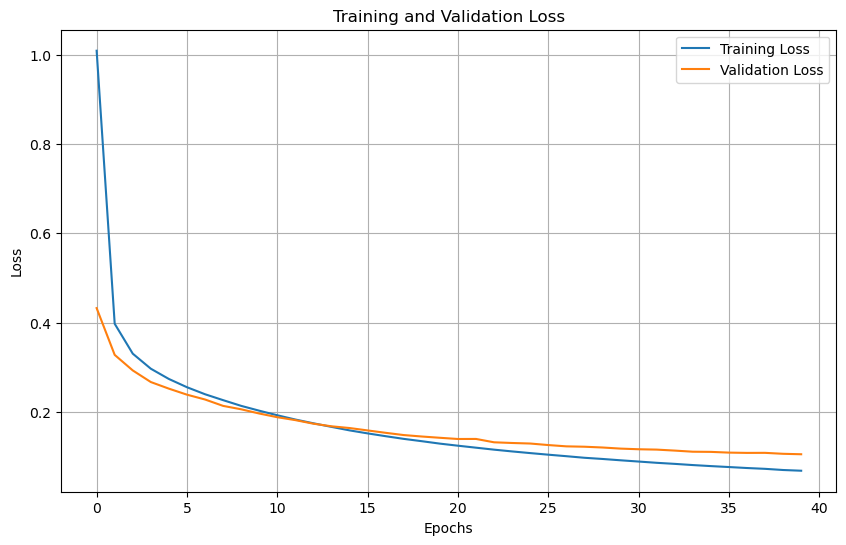

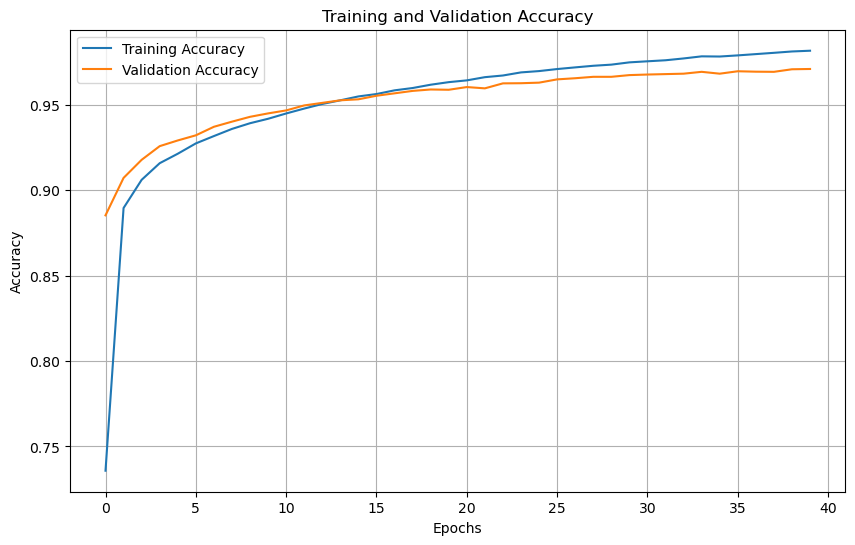

In [54]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()

In [55]:
import keras_tuner as kt
print("Keras Tuner imported successfully.")

Keras Tuner imported successfully.


In [56]:
from tensorflow import keras
from keras import layers  # Using tensorflow.keras consistently
from keras.callbacks import EarlyStopping  # Import EarlyStopping


# Define the model-building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()

    # Define input shape explicitly using Input layer
    model.add(layers.Input(shape=(28, 28)))

    # Flatten the input to a 1D vector
    model.add(layers.Flatten())  # Add this layer to flatten the input

    # Add hidden layers with hyperparameter tuning
    model.add(
        layers.Dense(
            units=hp.Int("units_1", min_value=32, max_value=256, step=32),  # Tune units
            activation="relu"
        )
    )
    model.add(
        layers.Dense(
            units=hp.Int("units_2", min_value=32, max_value=128, step=32),  # Second layer tuning
            activation="relu"
        )
    )
    model.add(layers.Dense(10, activation="softmax"))  # Output layer

    # Compile the model with tunable learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[5e-3, 1e-3, 1e-4])  # Tune learning rate
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


import keras_tuner as kt  # Import keras_tuner library

# Initialize the Keras Tuner
tuner = kt.Hyperband(
    build_model,               # The model-building function
    objective="val_accuracy",  # Optimization objective
    max_epochs=20,             # Maximum number of epochs for training
    factor=3,                  # Reduction factor for Hyperband
    directory="kt_tuning",     # Directory to save logs/results
    project_name="mnist_tuning"  # Name of the tuning project
)

# Define EarlyStopping callback
early_stopping_cb = EarlyStopping(
    monitor="val_loss",        # Monitor validation loss
    patience=5,                # Stop if no improvement for 3 consecutive epochs
    restore_best_weights=True  # Restore the best weights when stopping
)

# Run the tuner search with EarlyStopping callback
tuner.search(
    X_train_normalized,
    y_train_encoded,
    epochs=20,                # Increase epochs for early stopping
    validation_split=0.2,     # Use 20% for validation
    callbacks=[early_stopping_cb]  # Include the EarlyStopping callback
)

Trial 30 Complete [00h 00m 27s]
val_accuracy: 0.9738333225250244

Best val_accuracy So Far: 0.9783333539962769
Total elapsed time: 00h 05m 15s


In [57]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define a checkpoint callback
checkpoint_cb = ModelCheckpoint(
    "best_model.keras",  # Updated extension to .keras
    save_best_only=True,  # Save only the best model
    monitor="val_accuracy",  # Metric to monitor
    mode="max"  # Mode to maximize val_accuracy
)

# Define an EarlyStopping callback
early_stopping_cb = EarlyStopping(
    monitor="val_loss",        # Monitor validation loss
    patience=5,                # Stop if no improvement for 3 consecutive epochs
    restore_best_weights=True  # Restore the best weights when stopping
)

# Update the training call to include both callbacks
history = model.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=20,                # Increase epochs for early stopping
    batch_size=32,            # Batch size
    validation_split=0.2,     # Validation split
    callbacks=[checkpoint_cb, early_stopping_cb]  # Add both callbacks
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.9834 - loss: 0.0655 - val_accuracy: 0.9706 - val_loss: 0.1043
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9828 - loss: 0.0621 - val_accuracy: 0.9709 - val_loss: 0.1024
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.9829 - loss: 0.0626 - val_accuracy: 0.9711 - val_loss: 0.1017
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.9839 - loss: 0.0603 - val_accuracy: 0.9713 - val_loss: 0.1028
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.9834 - loss: 0.0598 - val_accuracy: 0.9713 - val_loss: 0.1003
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.9853 - loss: 0.0580 - val_accuracy: 0.9720 - val_loss: 0.1001
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.9841 - loss: 0.0574 - val_accuracy: 0.9719 - val_loss: 0.1011
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9849 -

In [58]:
# Load the best model saved during training
best_model = keras.models.load_model("best_model.keras")

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_normalized, y_test_encoded)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.9710 - loss: 0.0992
Test Loss: 0.0846
Test Accuracy: 0.9758


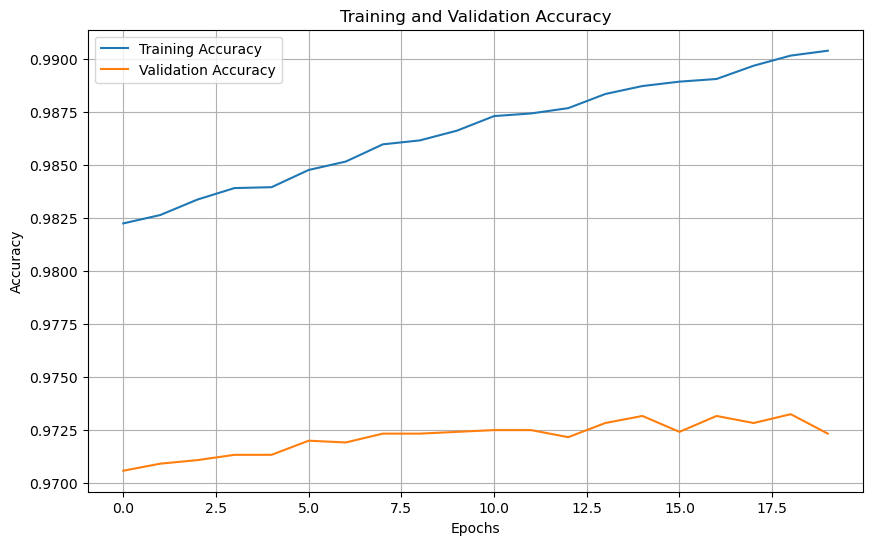

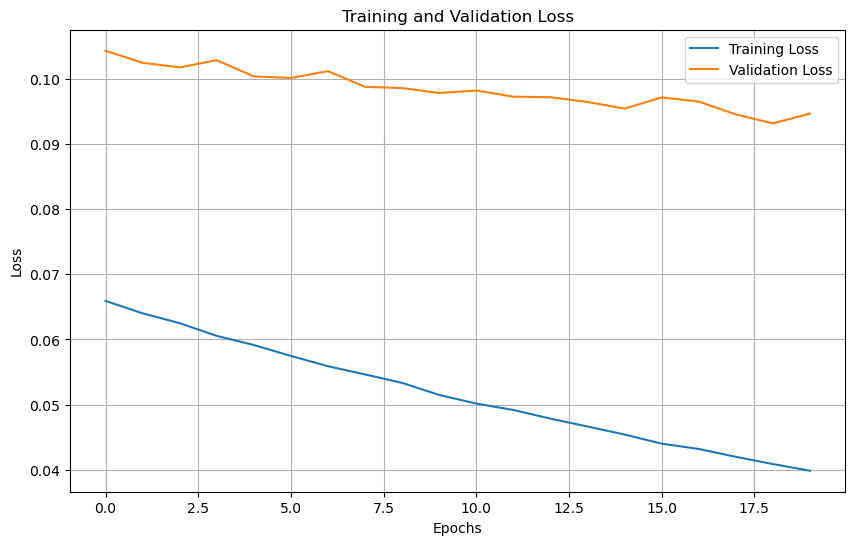

In [59]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


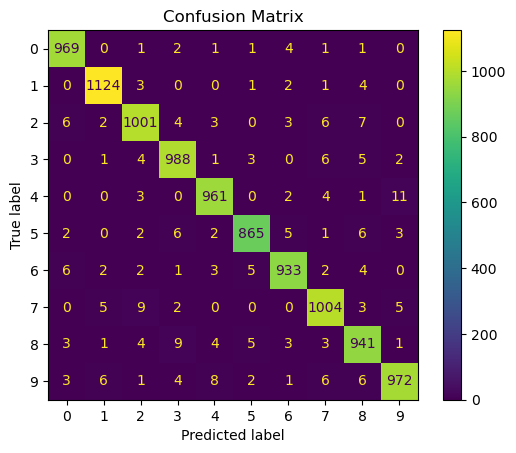

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred = model.predict(X_test_normalized)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class indices
y_true_classes = y_test  # True labels

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))
disp.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()